In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("titanic.csv")

In [3]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### lets work on continuous varibles 

In [5]:
### lets work on continuous varibles 

data_continuous = data.drop(columns = ["PassengerId","Name","Sex","Ticket","Cabin","Embarked"])


In [6]:
data_continuous.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [7]:
## lets check the missing values here
data_continuous.isnull().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [8]:
## lets work on Age feature, lets check how age values are impacting the survival rate

data_continuous.groupby(data_continuous["Age"].isnull()).mean()["Survived"]

Age
False    0.406162
True     0.293785
Name: Survived, dtype: float64

In [9]:
## The above result explains that 40 percent of the passengers whose age is not recorded are not survived

## lets replace the age value with the mean of all available ages

data_continuous["Age"].fillna(data_continuous["Age"].mean(), inplace =True)

In [10]:
data_continuous.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


<Figure size 432x288 with 0 Axes>

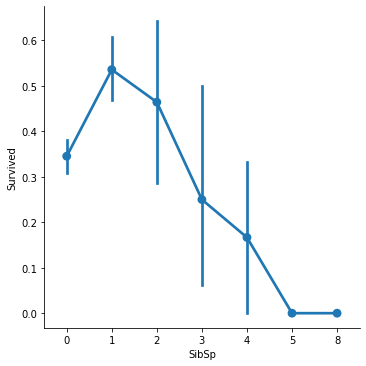

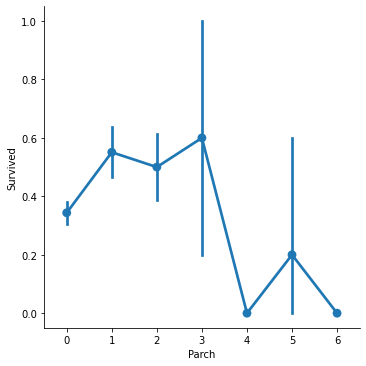

In [11]:
### lets analyze SibSp(siblings) and Parch (parent count) and the relationship of these features with the Survival status

for i,col in enumerate(["SibSp","Parch"]):
    plt.figure(i)
    sns.catplot(x=col, y="Survived", data= data_continuous,kind="point" )

In [12]:
## the plots shows that the survival rate decreses with the increase in the number of connection to a passengers, 
## so lets combine both of these features to a single feature as 

data_continuous["family_count"]= data_continuous["SibSp"]+ data_continuous["Parch"]

In [13]:
## drop the columns which were already added to a single column
data_continuous.drop(columns=["SibSp","Parch"], axis=1, inplace=True)

In [14]:
data_continuous.head()

,Survived,Pclass,Age,Fare,family_count
0,0,3,22.0,7.2500,1
1,1,1,38.0,71.2833,1
2,1,3,26.0,7.9250,0
3,1,1,35.0,53.1000,1
4,0,3,35.0,8.0500,0


### lets clean the categorical features

In [15]:
### lets clean the categorical features

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
data_categorical= data.drop(columns=["PassengerId","Pclass","Age","SibSp","Parch","Fare"], axis=1)

In [17]:
data_categorical.head()

,Survived,Name,Sex,Ticket,Cabin,Embarked
0,0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,1,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,0,"Allen, Mr. William Henry",male,373450,NaN,S


In [18]:
### Name doesnt contribute to the survival status of the passenger, lets drop name
data_categorical.drop(["Name"], axis=1, inplace=True)

In [19]:
## lets check the missing values
data_categorical.isnull().sum()

Survived      0
Sex           0
Ticket        0
Cabin       687
Embarked      2
dtype: int64

In [20]:
### cabin has a large missing values, lets see how cabin values are affecting the survival status 
data_categorical.groupby(data_categorical["Cabin"].isnull())['Survived'].mean()

Cabin
False    0.666667
True     0.299854
Name: Survived, dtype: float64

In [21]:
## The results shows that passengers with no cabin names are survived only 29 percentage, so lets make it a feature with 
## 0 for not survived and 1 for survived

data_categorical["Cabin"]= np.where(data_categorical['Cabin'].isnull(), 0, 1)

In [22]:
data_categorical.head()

,Survived,Sex,Ticket,Cabin,Embarked
0,0,male,A/5 21171,0,S
1,1,female,PC 17599,1,C
2,1,female,STON/O2. 3101282,0,S
3,1,female,113803,1,S
4,0,male,373450,0,S


<Figure size 432x288 with 0 Axes>

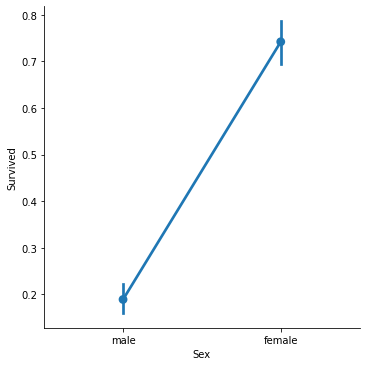

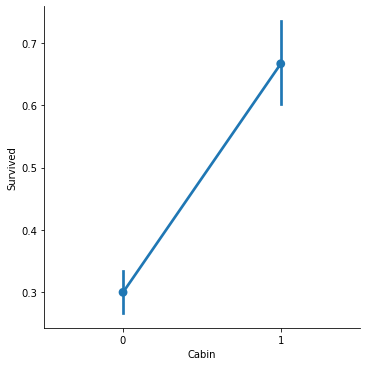

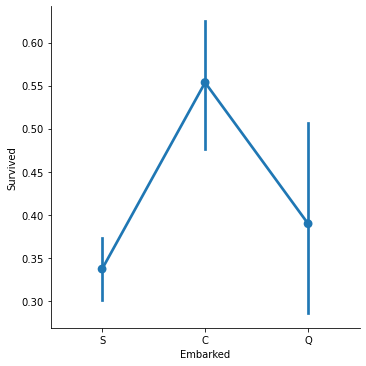

In [23]:
### lets find out the relation betwee Sex, Cabin and EMbarked to the survival status

for i, cols in enumerate(["Sex","Cabin","Embarked"]):
    
    plt.figure(i)
    sns.catplot(x=cols, y="Survived", data=data_categorical, kind="point")

In [24]:
### these plots helps us to understand that the passengers who embarked at C are mostly females and having cabins allocated\
## so , it is not an important feature that contributed to the survival stauts, it just dependent on the other features
## lets drop the feature

data_categorical.drop(columns=["Embarked"], axis=1, inplace=True)

In [25]:
data_categorical.head()

,Survived,Sex,Ticket,Cabin
0,0,male,A/5 21171,0
1,1,female,PC 17599,1
2,1,female,STON/O2. 3101282,0
3,1,female,113803,1
4,0,male,373450,0


In [26]:
### the only object type remained is Sex feature, lets convert it to numerical value as 
bins = {"male":0,"female":1}
data_categorical["Sex"] = data_categorical["Sex"].map(bins)

In [27]:
data_categorical.head()

,Survived,Sex,Ticket,Cabin
0,0,0,A/5 21171,0
1,1,1,PC 17599,1
2,1,1,STON/O2. 3101282,0
3,1,1,113803,1
4,0,0,373450,0


In [28]:
data_categorical.drop(columns=["Survived"], axis=1, inplace=True)

In [29]:
### ticket doesnt provide any correlation with survival status

data_categorical.drop(columns=["Ticket"], axis=1, inplace=True)

In [30]:
### lets combine both cleaned data frames of categorical and continuous features to a single df

cleaned_data = pd.concat([data_categorical,data_continuous], axis=1)

In [31]:
cleaned_data.head()

,Sex,Cabin,Survived,Pclass,Age,Fare,family_count
0,0,0,0,3,22.0,7.2500,1
1,1,1,1,1,38.0,71.2833,1
2,1,0,1,3,26.0,7.9250,0
3,1,1,1,1,35.0,53.1000,1
4,0,0,0,3,35.0,8.0500,0


In [32]:
### Now we have the clean data,so the next step is to split the data into train, test and validation set 

from sklearn.model_selection import train_test_split

In [33]:
## before proceeding lets divide the data to features and labels 
features = cleaned_data.drop(columns=["Survived"], axis=1)
labels = cleaned_data["Survived"]

In [34]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size= 0.4, random_state = 42)

In [35]:
## now split the test data to test and validation data

X_test, X_val, Y_test, Y_val = train_test_split(X_test, Y_test, test_size=0.5, random_state = 42)

In [36]:
Y_train.head()

570    1
787    0
74     1
113    0
635    1
Name: Survived, dtype: int64

## Lets dive into Algorithms


### 1. Logistic Regression 

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
dir(LogisticRegression)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_predict_proba_lr',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'decision_function',
 'densify',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params',
 'sparsify']

##### these are the list of hyper parameters of this model

class sklearn.linear_model.LogisticRegression(penalty='l2', *, dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

##### lets focus on hyper parameter c, which is the regularization technique that controls how close the model fits to the training data 
regularization - Reduce overfitting by discouraging overly complex models.!|

In [40]:
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [41]:
lr = LogisticRegression()

params = {"C":[0.001,0.01,0.1,1,10,100,1000]
}
cv = GridSearchCV(lr, params, cv=5)
cv.fit(X_train, Y_train)

C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]})

In [43]:
def print_cv(results):
    
    print("best parameters {}".format(results.best_params_))
    
    means = results.cv_results_["mean_test_score"]
    
    for mean, params in zip(means, results.cv_results_["params"]):
        print("mean is {} and parameter is {}".format(mean, params))
    

In [44]:
print_cv(cv)

best parameters {'C': 1}
mean is 0.67042849585611 and parameter is {'C': 0.001}
mean is 0.707899841297831 and parameter is {'C': 0.01}
mean is 0.7772703226944101 and parameter is {'C': 0.1}
mean is 0.7997178628107917 and parameter is {'C': 1}
mean is 0.7941103861752777 and parameter is {'C': 10}
mean is 0.7941103861752777 and parameter is {'C': 100}
mean is 0.7941103861752777 and parameter is {'C': 1000}


The above result explains that with the low C values which mean high regularization, the model performance is bad because of the underfitting.

when the c values increases which means regularization decreases, so that model overfits and the performance gradually decreases, so the best c values is at 1.


In [45]:
### lets save this model for the furture purpose as below

### pickel the model

import joblib

In [46]:
joblib.dump(cv.best_estimator_, "LR_model.pkl")

['LR_model.pkl']

## Support Vector Machine

In [47]:
from sklearn.svm import SVC

In [50]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)

import joblib
from sklearn.model_selection import GridSearchCV

In [51]:
model = SVC()
params = {
    "kernel": ["linear","rbf"],
    "C":[0.1,1,10]
}

cv = GridSearchCV(model, params, cv= 5)
cv.fit(X_train,Y_train)



GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']})

In [53]:
model.get_params().keys()

dict_keys(['C', 'break_ties', 'cache_size', 'class_weight', 'coef0', 'decision_function_shape', 'degree', 'gamma', 'kernel', 'max_iter', 'probability', 'random_state', 'shrinking', 'tol', 'verbose'])

In [54]:
def print_results(results):
    
    print("the best estimator is {}".format(results.best_params_))
    
    mean= results.cv_results_["mean_test_score"]
    for mean, params in zip(mean, results.cv_results_["params"]):
        print("the mean {} for params {}".format(mean, params))

In [55]:
print_results(cv)

the best estimator is {'C': 0.1, 'kernel': 'linear'}
the mean 0.7959619114794568 for params {'C': 0.1, 'kernel': 'linear'}
the mean 0.6536413330982189 for params {'C': 0.1, 'kernel': 'rbf'}
the mean 0.7959619114794568 for params {'C': 1, 'kernel': 'linear'}
the mean 0.6611179686122377 for params {'C': 1, 'kernel': 'rbf'}
the mean 0.7959619114794568 for params {'C': 10, 'kernel': 'linear'}
the mean 0.6835831423029447 for params {'C': 10, 'kernel': 'rbf'}


 linear represents the normal dimensions, and this gives the best results, so it means there is no requirement for applying kernal tricks on the data to transform the dimensions
 

In [56]:
joblib.dump(cv.best_estimator_, "SVMmodel.pkl")

['SVMmodel.pkl']

## Multi layer Perceptron 

In [57]:
from sklearn.neural_network import MLPClassifier

In [58]:
model = MLPClassifier()
params = {
    "activation":["relu","logistic","tanh"],
    "learning_rate":["constant","invscaling","adaptive"],
    "hidden_layer_sizes":[(10,),(20,),(50,)]
}

### here different activation functions performs different functions on the input features

## hidden layers (10,1 ) , 10 represents number of nodes in the layer and 1 represents the no of layers

### learning rate is the methods of making model to learn, constant - remains same , invscaling - the learning rate decreases gradually

### adaptive - it automatically adjustes

cv = GridSearchCV(model, params, cv = 5)
cv.fit(X_train, Y_train)


C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\vamsee\anaconda3\lib\site-packages\sklearn\neural_network\_

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['relu', 'logistic', 'tanh'],
                         'hidden_layer_sizes': [(10,), (20,), (50,)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']})

In [59]:
def print_results(cv):
    print("the best parameters are {}".format(cv.best_params_))
    
    mean = cv.cv_results_["mean_test_score"]
    for mean, pars in zip(mean, cv.cv_results_["params"]):
        print("mean {} for parametrs {}".format(mean, pars))

In [60]:
print_results(cv)

the best parameters are {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
mean 0.7678892611532359 for parametrs {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
mean 0.7229765473461471 for parametrs {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
mean 0.7060306824193263 for parametrs {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
mean 0.7603597249162405 for parametrs {'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate': 'constant'}
mean 0.7491624052195379 for parametrs {'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate': 'invscaling'}
mean 0.7453888203138777 for parametrs {'activation': 'relu', 'hidden_layer_sizes': (20,), 'learning_rate': 'adaptive'}
mean 0.7828777993299242 for parametrs {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
mean 0.8090812907776407 for parametrs {'activation': 're

In [61]:
joblib.dump(cv.best_estimator_, "MLP_model.pkl")

['MLP_model.pkl']

## Random Forest Model

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
model = RandomForestClassifier()
params = {
"max_depth":[10,20,30,None],
    "n_estimators":[10,50,100]
}

cv = GridSearchCV(model, params, cv= 5)
cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, None],
                         'n_estimators': [10, 50, 100]})

In [74]:
def print_res(cv):
    print("the best parameters are {}".format(cv.best_params_))
    mean = cv.cv_results_['mean_test_score']
    
    for mean, param in zip(mean, cv.cv_results_["params"]):
        print("the mean for params {} is {}".format(param, mean))
     

In [75]:
print_res(cv)

the best parameters are {'max_depth': 10, 'n_estimators': 50}
the mean for params {'max_depth': 10, 'n_estimators': 10} is 0.8258508199612061
the mean for params {'max_depth': 10, 'n_estimators': 50} is 0.8258684535355316
the mean for params {'max_depth': 10, 'n_estimators': 100} is 0.8165402927173337
the mean for params {'max_depth': 20, 'n_estimators': 10} is 0.7940222183036502
the mean for params {'max_depth': 20, 'n_estimators': 50} is 0.8108799153588432
the mean for params {'max_depth': 20, 'n_estimators': 100} is 0.8071592311761593
the mean for params {'max_depth': 30, 'n_estimators': 10} is 0.8145829659672016
the mean for params {'max_depth': 30, 'n_estimators': 50} is 0.8183741844471875
the mean for params {'max_depth': 30, 'n_estimators': 100} is 0.8090283900546641
the mean for params {'max_depth': None, 'n_estimators': 10} is 0.8052548051490037
the mean for params {'max_depth': None, 'n_estimators': 50} is 0.8071415976018338
the mean for params {'max_depth': None, 'n_estimato

In [76]:
joblib.dump(cv.best_estimator_,"randomForest_model.pkl")

['randomForest_model.pkl']

## Gradiant Boosting

In [67]:
from sklearn.ensemble import GradientBoostingClassifier

In [77]:
model = GradientBoostingClassifier()
params = {
    "n_estimators":[10,20,40,50],
    "max_depth":[1,4,7,9,None],
    "learning_rate":[0.01,0.1,1,10,100]
}

cv = GridSearchCV(model, params, cv=5)
cv.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1, 10, 100],
                         'max_depth': [1, 4, 7, 9, None],
                         'n_estimators': [10, 20, 40, 50]})

In [78]:
def print_res(cv):
    print("the best parameters are {}".format(cv.best_params_))
    
    mean = cv.cv_results_['mean_test_score']
    for mean, par in zip(mean, cv.cv_results_["params"]):
        print("the mean for params {} is {}".format(par, mean))

In [79]:
print_res(cv)

the best parameters are {'learning_rate': 1, 'max_depth': 1, 'n_estimators': 50}
the mean for params {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 10} is 0.6235937224475401
the mean for params {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 20} is 0.6235937224475401
the mean for params {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 40} is 0.6703226944101569
the mean for params {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50} is 0.7959619114794568
the mean for params {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 10} is 0.6235937224475401
the mean for params {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 20} is 0.6235937224475401
the mean for params {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 40} is 0.8128019749603244
the mean for params {'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 50} is 0.8202962440486686
the mean for params {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 10} is 0.6235937224475401
t

In [80]:
joblib.dump(cv.best_estimator_, "gradinatBoostModel.pkl")

['gradinatBoostModel.pkl']

## Model comparision and selecting the best Model

upto now we have developed many models and stored all of these models, now its time to trade off between the best and right model for our dataset, lets work on it below

In [85]:
models ={}

for mdl in ["LR_model","SVMmodel","MLP_model","randomForest_model","gradinatBoostModel"]:
    models[mdl]= joblib.load("{}.pkl".format(mdl))

In [86]:
models

{'LR_model': LogisticRegression(C=1),
 'SVMmodel': SVC(C=0.1, kernel='linear'),
 'MLP_model': MLPClassifier(hidden_layer_sizes=(50,), learning_rate='invscaling'),
 'randomForest_model': RandomForestClassifier(max_depth=10, n_estimators=50),
 'gradinatBoostModel': GradientBoostingClassifier(learning_rate=1, max_depth=1, n_estimators=50)}

In [91]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
import time

In [101]:
def evaluate_model(name,model, features, labels):
    start= time.time()
    pred = model.predict(features)
    end = time.time()
    acc = round(accuracy_score(labels, pred),3)
    precision = round(precision_score(labels, pred),3)
    recall = round(recall_score(labels, pred),3)
    
    print("model {} - accuarcy {} - precision {} - recall {} - latency {}".format(name, acc, precision, recall, round((end-start)*1000),4))
    
    

In [102]:
for name, model in models.items():
    evaluate_model(name, model, X_val, Y_val)

model LR_model - accuarcy 0.827 - precision 0.846 - recall 0.724 - latency 3
model SVMmodel - accuarcy 0.799 - precision 0.794 - recall 0.711 - latency 2
model MLP_model - accuarcy 0.816 - precision 0.831 - recall 0.711 - latency 2
model randomForest_model - accuarcy 0.827 - precision 0.857 - recall 0.711 - latency 8
model gradinatBoostModel - accuarcy 0.81 - precision 0.828 - recall 0.697 - latency 2


<h3>Here we have observed that, the Linear regression model, Random forest model and Gradinat boost model gives best results for the unseen validation data, now lets pick these three models and check how the results are obtained with the test data.</h3>

In [104]:
### now apply on the test data for  Linear regression, Random forest and Gradinat Boost model

for name in ["LR_model","randomForest_model","gradinatBoostModel"]:
    evaluate_model(name, models[name], X_test, Y_test)

model LR_model - accuarcy 0.775 - precision 0.712 - recall 0.646 - latency 6
model randomForest_model - accuarcy 0.792 - precision 0.741 - recall 0.662 - latency 16
model gradinatBoostModel - accuarcy 0.831 - precision 0.818 - recall 0.692 - latency 3
